In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scipy.stats as stats
import scipy.optimize
import numpy as np
import qng
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
stats.poisson.cdf(12,10.0)

0.79155647639487325

In [3]:
stats.poisson.ppf(0.95,10.0)

15.0

In [4]:
stats.poisson.cdf(15,10.0)

0.95125959669602123

In [5]:
range(1,5)

range(1, 5)

In [6]:
print(range(1,5))

range(1, 5)


In [10]:
for i in range(2,10):
    print (i)

2
3
4
5
6
7
8
9


In [7]:
arr_rate = 6
svc_rate = 3
c = 3
rho = arr_rate / (svc_rate * c)
load = arr_rate / svc_rate
print(arr_rate,svc_rate,c,rho,load)

6 3 3 0.6666666666666666 2.0


In [8]:
qng.mmc_prob_n(0, arr_rate, svc_rate, c)

0.1111111111111111

In [9]:
1/9

0.1111111111111111

In [3]:
pbar = np.ones(c)

In [4]:
for j in range(1,c):
    pbar[j] = arr_rate * pbar[j-1] / (j * svc_rate)

In [5]:
pbar

array([ 1.        ,  2.5       ,  3.125     ,  2.60416667])

In [6]:
sum(pbar)

9.2291666666666661

In [8]:
gamma = sum(pbar) + rho * pbar[c-1] / (1 - rho)
print(gamma)

13.5694444444


In [15]:
max(0,5)

5

In [6]:
qng.mmc_mean_qwait(arr_rate, svc_rate, c)

0.14814814814814811

In [7]:
arr_rate/(svc_rate * c)

0.6666666666666666

In [9]:
qng.mmc_waitq_cdf(0.14814814814814811,arr_rate, svc_rate, c)

0.71503093847557575

In [10]:
qng.mmc_waitq_cdf(0.5, arr_rate, svc_rate, c)

0.90083103993403124

In [11]:
p = -1
t = 0.1
p = qng.mmc_waitq_cdf(t, arr_rate, svc_rate, c)

while p < 0.95:
    p = qng.mmc_waitq_cdf(t, arr_rate, svc_rate, c)
    print(p,t)
    t = t + 0.1

0.670747457475 0.1
0.756083717292 0.2
0.819302373449 0.30000000000000004
0.866135905817 0.4
0.900831039934 0.5
0.926533827457 0.6
0.945574920776 0.7
0.959680909649 0.7999999999999999


In [12]:
p = -1
t = 0.7282
p = qng.mmc_waitq_cdf(t, arr_rate, svc_rate, c)

while p < 0.95:
    p = qng.mmc_waitq_cdf(t, arr_rate, svc_rate, c)
    print(p,t)
    t = t + 0.00001

0.949989896112 0.7282
0.949991396393 0.7282099999999999
0.949992896629 0.7282199999999999
0.949994396819 0.7282299999999998
0.949995896965 0.7282399999999998
0.949997397065 0.7282499999999997
0.949998897121 0.7282599999999997
0.950000397132 0.7282699999999996


In [13]:
def find_pctile(t, p, arr_rate, svc_rate, c):
    return qng.mmc_waitq_cdf(t, arr_rate, svc_rate, c) - p

In [14]:
p = 0.95
scipy.optimize.newton(find_pctile,0.5,args=(p, arr_rate, svc_rate, c))

0.72826735244588692

In [15]:
qng.mmc_waitq_pctile(p,arr_rate, svc_rate, c)

0.72826735244589413

In [22]:
qng.mm1_waitq_cdf(1.0,barber_arr, barber_svc)

0.693433799023798

In [25]:
qng.mmc_waitq_cdf(1.0,barber_arr, barber_svc, barber_c)

0.69343379902379798

In [17]:
qng.mmc_waitq_pctile(p,arr_rate, c * svc_rate, 1)

0.86342238848194153

In [18]:
barber_arr = 5
barber_svc = 6
barber_c = 1

In [20]:
qng.mmc_mean_qsize(barber_arr, barber_svc, barber_c)

4.1666666666666679

In [23]:
qng.mm1_waitq_pctile(0.9,barber_arr, barber_svc)

2.1202635362000914

In [24]:
qng.mm1_waitq_cdf(2.1202635362000914,barber_arr, barber_svc)

0.9

In [28]:
5/6 * math.exp(-1.0)

0.30656620097620196

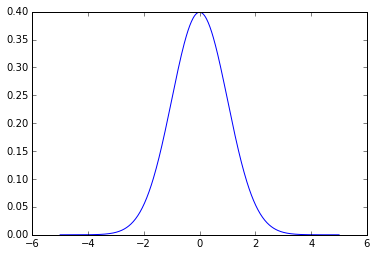

In [7]:
x = np.linspace(-5, 5, 500)
plt.plot(x, stats.norm.pdf(x))

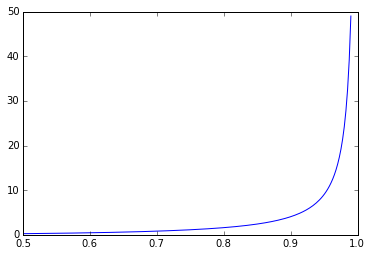

In [4]:
rho = np.linspace(0.5, .99, 200)
plt.plot(rho, qng.mg1_mean_qsize(rho,1,1))

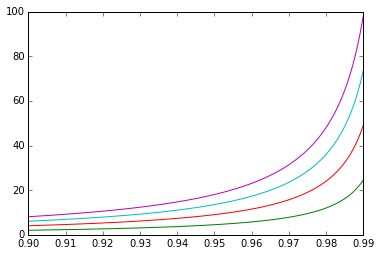

In [16]:
rho = np.linspace(0.9, .99, 200)
for cv2 in np.linspace(0, 2, 5):
    plt.plot(rho, qng.mg1_mean_qsize(rho,1,cv2))

In [9]:
rho = np.linspace(0.5, .99, 200)
load = rho * 2
qsize = [qng.mmc_mean_qsize(l, 1, 2) for l in load]

In [7]:
load

array([ 1.        ,  1.00492462,  1.00984925,  1.01477387,  1.01969849,
        1.02462312,  1.02954774,  1.03447236,  1.03939698,  1.04432161,
        1.04924623,  1.05417085,  1.05909548,  1.0640201 ,  1.06894472,
        1.07386935,  1.07879397,  1.08371859,  1.08864322,  1.09356784,
        1.09849246,  1.10341709,  1.10834171,  1.11326633,  1.11819095,
        1.12311558,  1.1280402 ,  1.13296482,  1.13788945,  1.14281407,
        1.14773869,  1.15266332,  1.15758794,  1.16251256,  1.16743719,
        1.17236181,  1.17728643,  1.18221106,  1.18713568,  1.1920603 ,
        1.19698492,  1.20190955,  1.20683417,  1.21175879,  1.21668342,
        1.22160804,  1.22653266,  1.23145729,  1.23638191,  1.24130653,
        1.24623116,  1.25115578,  1.2560804 ,  1.26100503,  1.26592965,
        1.27085427,  1.27577889,  1.28070352,  1.28562814,  1.29055276,
        1.29547739,  1.30040201,  1.30532663,  1.31025126,  1.31517588,
        1.3201005 ,  1.32502513,  1.32994975,  1.33487437,  1.33

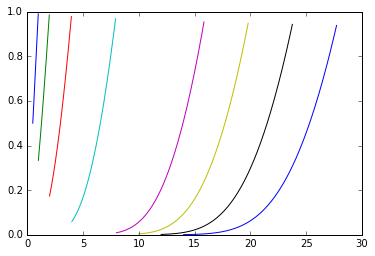

In [6]:
rho = np.linspace(0.5, .99, 200)
for c in [1, 2, 4, 8, 16, 20, 24, 28]:
    load = rho * c
    pdelay = [qng.erlangc(l, c) for l in load]
    plt.plot(load, pdelay)

# Debugging Whitt's GI/G/m code

In [3]:
# D/M/m from Table2 - SEEMS TO BE OVERESTIMATING. ONLY WORKING NOW BECAUSE I KLUDGED IN
# A TRAP FOR THE D/M/m CASE AND CALL A FUNCTION FOR THAT CASE THAT IMPLEMENTS EQ 2.20 OF WHITT.
rho = 0.80
m = 4
lam = rho * m
tablevalue = 0.87
print(qng.ggm_mean_qwait_whitt(rho * m, 1.0, m, 0, 1) * lam, tablevalue)

rho = 0.80
m = 8
lam = rho * m
tablevalue = 0.58
print(qng.ggm_mean_qwait_whitt(rho * m, 1.0, m, 0, 1) * lam, tablevalue)

0.872525367112 0.87
0.57846270743 0.58


In [4]:
# D/M/m from Table2 but using 2.20 - SEE COMMENT ABOVE FOR ONLY REASON THESE TWO MATCH NOW
rho = 0.8
m = 4
lam = rho * m

print(qng.dmm_mean_qwait_whitt(rho * m, 1.0, m, 0, 1) * lam)
print(qng.ggm_mean_qwait_whitt(rho * m, 1.0, m, 0, 1) * lam)

0.872525367112
0.872525367112


So, why do these two methods give different answers? I'm matching the values in Table 2 using 2.20.

Does Eq 2.24 reduce to 2.20 for the D/M/m case? It boils down to whether phi_0 reduces to phi_3?

Below, it seems that 2.16 for M/D/m gives same results as 2.24. 

According to Whitt (1993), bottom of p125, yes indeed, 2.24 is consistent with 2.16 when cs2=0 and with 2.20 when ca2=0. THEREFORE I MUST HAVE AN ERROR IN MY PHI_0 FOR THE SECOND CASE OF 2.25 (ca2 < cs2)

In [7]:
# Phi_0 should equal Phi_3 for M/D/m - it does NOT. Since the dmm function is working, it would seem that phi_0 
# is the culprit. Case 2.
rho = 0.8
m = 4
print(qng.phi_0(rho, 0 , 1, m), qng.phi_3(m, rho))

0.80708331013629 0.7314536082328932


In [8]:
# For DMm, psi_0 must equal phi_3 since phi = (1/2)phi_3 + (1/2)psi_0
# Furthermore, phi_3 appears correct since i can match Table 2 via Eq 2.20 which uses phi_3 directly
print(qng.psi_0(0.5,m,rho), qng.phi_3(m,rho), qng.phi_3(m,rho) / qng.psi_0(0.5,m,rho))

0.8827130120396869 0.7314536082328932 0.8286426032654959


In [9]:
qng.phi_4(m,rho)

0.8827130120396869

In [48]:
qng.phi_4(m,rho) ** 1.5

0.8293336608905804

In [34]:
# Phi_0 should equal Phi_1 for M/D/m - it does
rho = 0.95
m = 30
print(qng.phi_0(rho, 1 , 0, m), qng.phi_1(m, rho))

1.0331009359357166 1.0331009359357166


In [16]:
print("gamma: ", qng.gamma_0(4, .8))
print("ph1_1: ", qng.phi_1(4, .8))
print("ph1_2: ", qng.phi_2(4, .8))
print("ph1_3: ", qng.phi_3(4, .8))
print("ph1_4: ", qng.phi_4(4, .8))
qng.phi_2(4, .8) * math.exp(-2 * (1-0.8)/(3*0.8))

gamma:  0.03397241584648072
ph1_1:  1.0339724158464807
ph1_2:  0.8641103366140771
ph1_3:  0.7314536082328932
ph1_4:  0.8827130120396869


0.7314536082328932

In [17]:
1-4*(0.034)

0.864

In [18]:
(1-0.8)*(4-1)*(((4+5*4)**0.5)-2)/(16 * 4 * 0.8)

0.03397241584648072

In [19]:
0.864 * math.exp(-2*(1-0.8)/(3 * 0.8))

0.7313602103054906

In [24]:
# M/D/m from Table 3 - SEEMS TO BE WORKING FOR M/D/m
# should be 0.53
print(qng.ggm_mean_qwait_whitt(0.7 * 4, 1.0, 4, 1, 0) * 0.7 * 4)
print(qng.mdm_mean_qwait_whitt(0.7 * 4, 1.0, 4, 1, 0) * 0.7 * 4)

# should be 2.61
rho = 0.90
m = 20
lam = rho * m
tablevalue = 2.61
print(qng.ggm_mean_qwait_whitt(rho * m, 1.0, m, 1, 0) * lam)
print(qng.mdm_mean_qwait_whitt(rho * m, 1.0, m, 1, 0) * lam)

0.529221550111
0.529221550111
2.6125062875
2.6125062875


In [5]:
# M/D/m from Table 3 - 
# should be 1.44
rho = 0.8
m = 2
lam = rho * m
print(qng.ggm_mean_qwait_whitt(rho * m, 1.0, m, 1, 0) * lam)
print(qng.mdc_mean_qwait_cosmetatos(rho * m, 1.0, m) * lam)
# Just for fun, what is corresponding mean wait in M/M/m
print(qng.mmc_mean_qwait(rho * m, 1.0, m) * lam)

1.44157397096
1.44157397096
2.84444444444


In [37]:
# h2/M/m from Table 4 - - SEEMS TO BE WORKING FOR M/D/m
ca2 = 2.25
rho = 0.5
m = 2
lam = rho * m
qng.ggm_mean_qwait_whitt(rho * m, 1.0, m, ca2, 1) * lam

0.56623431643669841

In [5]:
# E4/M/m from Table5 - SEEMS TO BE WORKING
rho = 0.8
m = 2
lam = rho * m
tablevalue = 1.58
print(qng.ggm_mean_qwait_whitt(rho * m, 1.0, m, 0.25, 1) * lam, tablevalue)

tablevalue = 3.58
print(qng.ggm_mean_qwait_whitt(0.9 * 8, 1.0, 8, 0.25, 1) * 0.9 * 8, tablevalue)

tablevalue = 8.4
print(qng.ggm_mean_qwait_whitt(0.95 * 20, 1.0, 20, 0.25, 1) * 0.95 * 20, tablevalue)

tablevalue = 1.28
print(qng.ggm_mean_qwait_whitt(0.8 * 4, 1.0, 4, 0.25, 1) * 0.8 * 4, tablevalue)

1.58348787833 1.58
3.58322523059 3.58
8.35574110007 8.4
1.27772295628 1.28


In [6]:
.5 * .7313 / .8827

0.4142403987764812

# Testing P(Wq > 0) approximation from Whitt 

## Table 14 on p137

In [45]:
# M/M/4
exact = 0.79
whitt = 0.79
simio = 0.79
rho = 0.9
m = 4
lam = rho * m
mu = 1
ca2 = 1.0
cs2 = 1.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)

print("exact={0}, whitt={1}, mywhitt={2:6.3f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.79, whitt=0.79, mywhitt= 0.788, simio=0.79, whichpi=1


In [46]:
# D/M/4
exact = 0.67
whitt = 0.65
simio = 0.664
rho = 0.9
m = 4
lam = rho * m
mu = 1
ca2 = 0.0
cs2 = 1.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.3f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.67, whitt=0.65, mywhitt= 0.645, simio=0.664, whichpi=1


In [47]:
# H2/M/4 (ca2=2.25)
exact = 0.85
whitt = 0.85
simio = 0.845
rho = 0.9
m = 4
lam = rho * m
mu = 1
ca2 = 2.25
cs2 = 1.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.3f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.85, whitt=0.85, mywhitt= 0.844, simio=0.845, whichpi=1


In [48]:
# E4/M/4
exact = 0.71
whitt = 0.70
simio = 0
rho = 0.9
m = 4
lam = rho * m
mu = 1
ca2 = 0.25
cs2 = 1.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.3f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.71, whitt=0.7, mywhitt= 0.701, simio=0, whichpi=1


In [49]:
# G/M/4
exact = 0.75
whitt = 0.75
simio = 0 # Unknown G
rho = 0.9
m = 4
lam = rho * m
mu = 1
ca2 = 0.56
cs2 = 1.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.3f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.75, whitt=0.75, mywhitt= 0.747, simio=0, whichpi=1


In [50]:
# M/D/4
exact = 0.78
whitt = 0.79
simio = 0
rho = 0.9
m = 4
lam = rho * m
mu = 1
ca2 = 1.0
cs2 = 0.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.3f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.78, whitt=0.79, mywhitt= 0.788, simio=0, whichpi=1


In [51]:
# M/H2/4
exact = 0.79
whitt = 0.79
simio = 0
rho = 0.9
m = 4
lam = rho * m
mu = 1
ca2 = 1.0
cs2 = 2.25
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.3f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.79, whitt=0.79, mywhitt= 0.788, simio=0, whichpi=1


In [52]:
# M/G/4
exact = 0.79
whitt = 0.79
rho = 0.9
m = 4
lam = rho * m
mu = 1
ca2 = 1.0
cs2 = 0.75
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.3f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.79, whitt=0.79, mywhitt= 0.788, simio=0, whichpi=1


In [53]:
# D/H2/4 (cs2=2.0) - 
exact = 0.70
whitt = 0.71
simio = 0.74
rho = 0.9
m = 4
lam = rho * m
mu = 1
ca2 = 0.0
cs2 = 2.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.3f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.7, whitt=0.71, mywhitt= 0.702, simio=0.74, whichpi=1


In [24]:
# For H2 arrivals with balanced means
ca2 = 2.25
rho = 0.8
m = 20
p1 = 0.5 * (1+math.sqrt((ca2-1) / (ca2+1)))
p2 = 1 - p1  
lam1 = 2 * p1 * rho * m
lam2 = 2 * p2 * rho * m
print("p1={0:7.4f}, p2={1:7.4f}, lam1={2:7.4f}, lam2={3:7.4f}, p1_lam1={4:7.4f}, p2_lam2={5:7.4f}".format(p1,p2,lam1,lam2,p1/lam1,p2/lam2))

p1= 0.8101, p2= 0.1899, lam1=25.9228, lam2= 6.0772, p1_lam1= 0.0312, p2_lam2= 0.0312


In [18]:
# For H2 service with balanced means
cs2 = 2.25
p1 = 0.5 * (1+math.sqrt((cs2-1) / (cs2+1)))
p2 = 1 - p1  
mu1 = 2 * p1
mu2 = 2 * p2
print("p1={0:7.4f}, p2={1:7.4f}, mu1={2:7.4f}, mu2={3:7.4f}, p1_mu1={4:7.4f}, p2_mu2={5:7.4f}".format(p1,p2,mu1,mu2,p1/mu1,p2/mu2))

p1= 0.8101, p2= 0.1899, mu1= 1.6202, mu2= 0.3798, p1_mu1= 0.5000, p2_mu2= 0.5000


In [55]:
# E2/H2/4 
exact = 0.76
whitt = 0.76
simio = 0
rho = 0.9
m = 4
lam = rho * m
mu = 1
ca2 = 0.5
cs2 = 2.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.3f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.76, whitt=0.76, mywhitt= 0.755, simio=0, whichpi=1


In [56]:
# D/H2/4 - 
exact = 0.74
whitt = 0.75
simio = 0
rho = 0.9
m = 4
lam = rho * m
mu = 1
ca2 = 0.0
cs2 = 9.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.4f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.74, whitt=0.75, mywhitt=0.7475, simio=0, whichpi=1


In [57]:
# H2/H2/4 - Need to simulate
exact = 0.92
whitt = 0.86
simio = 0
rho = 0.9
m = 4
lam = rho * m
mu = 1
ca2 = 9.0
cs2 = 9.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.4f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.92, whitt=0.86, mywhitt=0.8634, simio=0, whichpi=1


In [58]:
# G/E2/4 - - 
exact = 0.64
whitt = 0.60
simio = 0
rho = 0.9
m = 4
lam = rho * m
mu = 1
ca2 = 0.1
cs2 = 0.5
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.4f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.64, whitt=0.6, mywhitt=0.5953, simio=0, whichpi=1


In [59]:
# D/M/20 - Matching whitt but not exact. Need to simulate this one
exact = 0.39
whitt = 0.31
simio = 0
rho = 0.9
m = 20
lam = rho * m
mu = 1
ca2 = 0.0
cs2 = 1.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.4f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.39, whitt=0.31, mywhitt=0.3122, simio=0, whichpi=1


In [60]:
# G/M/4 - 
exact = 0.39
whitt = 0.38
simio = 0
rho = 0.6
m = 2
lam = rho * m
mu = 1
ca2 = 0.5
cs2 = 9.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.4f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.39, whitt=0.38, mywhitt=0.3834, simio=0, whichpi=1


In [4]:
# H2/D/4 - pretty close. Simulation not matching exact.
exact = 0.86
whitt = 0.86
simio = 0.83
rho = 0.9
m = 4
lam = rho * m
mu = 1
ca2 = 2.25
cs2 = 0.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.4f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.86, whitt=0.86, mywhitt=0.8650, simio=0.83, whichpi=1


# Testing P(Wq > 0) approximation from Whitt 

## Table 16 on p141

These results look good. I'm matching Whitt's approximation over nice range of rho values and for m=4 and m=20.

In [62]:
# H2/M/20 - rho = 0.5
exact = 0.016
whitt = 0.024
simio = 0
rho = 0.5
m = 20
lam = rho * m
mu = 1
ca2 = 2.25
cs2 = 1.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.4f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.016, whitt=0.024, mywhitt=0.0248, simio=0, whichpi=1


In [63]:
# H2/M/20 - rho = 0.7
exact = 0.18
whitt = 0.21
simio = 0
rho = 0.7
m = 20
lam = rho * m
mu = 1
ca2 = 2.25
cs2 = 1.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.4f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.18, whitt=0.21, mywhitt=0.2129, simio=0, whichpi=1


In [64]:
# H2/M/20 - rho = 0.8
exact = 0.37
whitt = 0.40
simio = 0
rho = 0.8
m = 20
lam = rho * m
mu = 1
ca2 = 2.25
cs2 = 1.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.4f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.37, whitt=0.4, mywhitt=0.4016, simio=0, whichpi=1


In [65]:
# H2/M/4 - rho = 0.5
exact = 0.28
whitt = 0.30
simio = 0
rho = 0.5
m = 4
lam = rho * m
mu = 1
ca2 = 2.25
cs2 = 1.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.4f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.28, whitt=0.3, mywhitt=0.2950, simio=0, whichpi=1


In [66]:
# H2/M/4 - rho = 0.7
exact = 0.28
whitt = 0.30
simio = 0
rho = 0.5
m = 4
lam = rho * m
mu = 1
ca2 = 2.25
cs2 = 1.0
approx = qng.ggm_prob_wait_whitt(lam, mu, m, ca2, cs2)
whichpi = qng.ggm_prob_wait_whitt_whichpi(rho, m, ca2, cs2)
print("exact={0}, whitt={1}, mywhitt={2:6.4f}, simio={3}, whichpi={4}".format(exact, whitt, approx, simio, whichpi))

exact=0.28, whitt=0.3, mywhitt=0.2950, simio=0, whichpi=1


# Testing Whitt ggc wait time cdf approximation

In [7]:
# See Table 26
rho = 0.8
m = 4
lam = rho * m
mu = 1
ca2 = 0.5
cs2 = 2.0
qng.ggc_qwait_pctile_whitt(.95,lam,mu,m,ca2,cs2)

3.8385881505425026

In [10]:
# See Table 26
rho = 0.8
m = 2
lam = rho * m
mu = 1
ca2 = 2.0
cs2 = 2.0
qng.ggc_qwait_pctile_whitt(.98,lam,mu,m,ca2,cs2)

17.822035508275903

In [11]:
# See Table 26
rho = 0.8
m = 2
lam = rho * m
mu = 1
ca2 = 2.0
cs2 = 2.0
qng.ggm_qwait_cdf_whitt(18.0,lam,mu,m,ca2,cs2)

0.98064021237865229

In [14]:
# M/D/m - rho = 0.7
# Testing ED and cd2

whitt_ed = 0.23
whitt_cd2 = 0.8
rho = 0.7
m = 8
lam = rho * m
mu = 1
ca2 = 1.0
cs2 = 0.0
mywhitt_ed = qng.ggm_qcondwait_whitt_ed(lam, mu, m, ca2, cs2)
mywhitt_cd2 = qng.ggm_qcondwait_whitt_cd2(rho, cs2)

print("whitt_ed={0}, mywhitt_ed={1:6.4f}, whitt_cd2={2}, mywhitt_cd2={3:6.4f}".format(whitt_ed, mywhitt_ed, whitt_cd2, mywhitt_cd2))

whitt_ed=0.23, mywhitt_ed=0.2310, whitt_cd2=0.8, mywhitt_cd2=0.8


In [15]:
# M/D/m - rho = 0.9
# Testing ED and cd2

whitt_ed = 0.64
whitt_cd2 = 0.93
rho = 0.9
m = 8
lam = rho * m
mu = 1
ca2 = 1.0
cs2 = 0.0
mywhitt_ed = qng.ggm_qcondwait_whitt_ed(lam, mu, m, ca2, cs2)
mywhitt_cd2 = qng.ggm_qcondwait_whitt_cd2(rho, cs2)

print("whitt_ed={0}, mywhitt_ed={1:6.4f}, whitt_cd2={2}, mywhitt_cd2={3:6.4f}".format(whitt_ed, mywhitt_ed, whitt_cd2, mywhitt_cd2))

whitt_ed=0.64, mywhitt_ed=0.6426, whitt_cd2=0.93, mywhitt_cd2=0.9333


In [16]:
# G/H2/m - rho = 0.7
# Testing ED and cd2

whitt_ed = 0.6
whitt_cd2 = 1.23
rho = 0.7
m = 8
lam = rho * m
mu = 1
ca2 = 1.0
cs2 = 2.25
mywhitt_ed = qng.ggm_qcondwait_whitt_ed(lam, mu, m, ca2, cs2)
mywhitt_cd2 = qng.ggm_qcondwait_whitt_cd2(rho, cs2)

print("whitt_ed={0}, mywhitt_ed={1:6.4f}, whitt_cd2={2}, mywhitt_cd2={3:6.4f}".format(whitt_ed, mywhitt_ed, whitt_cd2, mywhitt_cd2))

whitt_ed=0.6, mywhitt_ed=0.6022, whitt_cd2=1.23, mywhitt_cd2=1.2308


In [17]:
# G/H2/m - rho = 0.9
# Testing ED and cd2

whitt_ed = 1.96
whitt_cd2 = 1.08
rho = 0.9
m = 8
lam = rho * m
mu = 1
ca2 = 1.0
cs2 = 2.25
mywhitt_ed = qng.ggm_qcondwait_whitt_ed(lam, mu, m, ca2, cs2)
mywhitt_cd2 = qng.ggm_qcondwait_whitt_cd2(rho, cs2)

print("whitt_ed={0}, mywhitt_ed={1:6.4f}, whitt_cd2={2}, mywhitt_cd2={3:6.4f}".format(whitt_ed, mywhitt_ed, whitt_cd2, mywhitt_cd2))

whitt_ed=1.96, mywhitt_ed=1.9625, whitt_cd2=1.08, mywhitt_cd2=1.0769


# Comparing Whitt and Tijms for P(Wq > t | Wq > 0)

Tijms derives an approximate renewal equation for the wait time CDF in M/G/c. Whitt has a two moment approximation for G/G/c that is much simpler. How close are these two approximations? We can use Table 1 in the Tijms paper as the basis of comparison. The "exact" results are based on simulation by Tijms.

As you can see from the four cases tested below, the Whitt two moment approximation for G/G/c is remarkably accurate (and much simpler than dealing with numeric integration of various service time distributions).

In [19]:
# M/H2/5 - rho = 0.8 (cs2 = 2.25)
t = 1.0
exact = 0.48
rho = 0.8
m = 5
lam = rho * m
mu = 1
ca2 = 1.0
cs2 = 2.25
whittapprox = 1.0 - qng.ggm_qcondwait_cdf_whitt(t,lam, mu, m, ca2, cs2)
tijmsapprox = 0.4775
print("exact={0}, whittapprox={1:6.4f}, tijmsapprox={2}".format(exact, whittapprox, tijmsapprox))

exact=0.48, whittapprox=0.5042, tijmsapprox=0.4775


In [20]:
# M/H2/5 - rho = 0.8 (cs2 = 2.25)
t = 3.0
exact = 0.14
rho = 0.8
m = 5
lam = rho * m
mu = 1
ca2 = 1.0
cs2 = 2.25
whittapprox = 1.0 - qng.ggm_qcondwait_cdf_whitt(t,lam, mu, m, ca2, cs2)
tijmsapprox = 0.1527
print("exact={0}, whittapprox={1:6.4f}, tijmsapprox={2}".format(exact, whittapprox, tijmsapprox))

exact=0.14, whittapprox=0.1403, tijmsapprox=0.1527


In [21]:
# M/E2/5 - rho = 0.8 (cs2 = 0.5)
t = 1.0
exact = 0.27
rho = 0.8
m = 5
lam = rho * m
mu = 1
ca2 = 1.0
cs2 = 0.5
whittapprox = 1.0 - qng.ggm_qcondwait_cdf_whitt(t,lam, mu, m, ca2, cs2)
tijmsapprox = 0.2747
print("exact={0}, whittapprox={1:6.4f}, tijmsapprox={2}".format(exact, whittapprox, tijmsapprox))

exact=0.27, whittapprox=0.2690, tijmsapprox=0.2747


In [22]:
# M/D/5 - rho = 0.8 (cs2 = 0.0)
t = 1.0
exact = 0.1413
rho = 0.8
m = 5
lam = rho * m
mu = 1
ca2 = 1.0
cs2 = 0.0
whittapprox = 1.0 - qng.ggm_qcondwait_cdf_whitt(t,lam, mu, m, ca2, cs2)
tijmsapprox = 0.1516
print("exact={0}, whittapprox={1:6.4f}, tijmsapprox={2}".format(exact, whittapprox, tijmsapprox))

exact=0.1413, whittapprox=0.1371, tijmsapprox=0.1516


# Evaluating Equation 5.2 of Whitt

Return the approximate P(Q>0) in G/G/m queue using Whitt's simple
approximation involving rho and P(W>0).

This approximation is exact for M/M/m and has strong theoretical
support for GI/M/m. It's described by Whitt as "crude" but is
"a useful quick approximation".

Equation 5.1 is preferred for non-exponential service but involves 25 separate cases based
on ranges of cv2 for an interarrival time and a delay distribution. It uses many of the ideas
for Whitt's two-moment approximation for conditional wait (i.e. delay).

Table 29 in Whitt's G/G/m paper has some exact results for M/E2/8. The table includes P(Q<=k) and so
we can look at P(Q>0) = 1-P(Q<=0)


In [4]:
# M/E2/8 - rho = 0.7 (cs2 = 0.5)
exact = 1-0.823
rho = 0.7
m = 8
lam = rho * m
mu = 1
ca2 = 1.0
cs2 = 0.5
whittapprox_52 = qng.ggm_qsize_prob_gt_0_whitt_5_2(lam, mu, m, ca2, cs2)
whittapprox_51 = 1-.811
print("exact={0}, whittapprox_52={1:6.4f}, whittapprox_51={2}".format(exact, whittapprox_52, whittapprox_51))

exact=0.17700000000000005, whittapprox_52=0.1894, whittapprox_51=0.18899999999999995


In [5]:
# M/E2/8 - rho = 0.9 (cs2 = 0.5)
exact = 1-0.385
rho = 0.9
m = 8
lam = rho * m
mu = 1
ca2 = 1.0
cs2 = 0.5
whittapprox_52 = qng.ggm_qsize_prob_gt_0_whitt_5_2(lam, mu, m, ca2, cs2)
whittapprox_51 = 1-.369
print("exact={0}, whittapprox_52={1:6.4f}, whittapprox_51={2}".format(exact, whittapprox_52, whittapprox_51))

exact=0.615, whittapprox_52=0.6314, whittapprox_51=0.631


# Testing mmc inverse (staffing to meet service level)

In [4]:
arr_rate = 326/30
svc_rate = 1/(34/60)

In [5]:
qng.mmc_qwait_cdf_inv(9/60, 0.9, arr_rate, svc_rate)

10

In [10]:
qng.mmc_qwait_cdf(9/60, arr_rate, svc_rate, 10)

0.9579577103592947